In [1]:
import warnings
warnings.simplefilter('ignore')

%matplotlib inline
import numpy as np
import pandas as pd
from datetime import datetime
from scipy import stats
import statsmodels.api as sm
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = [12.0, 8.0]

In [2]:
all = pd.read_csv("data/labstar_tableau.csv")

In [ ]:
all.info()

In [4]:
all.isnull().sum()

lab_name                           0
subscriber_id                      0
subscriber_name                    0
subscriber_plan_id                 0
subscriber_plan_name               0
subscriber_features_nb             0
subscriber_last_updated            0
case_id                            0
unit_id                            0
product_id                         0
product_name                    1165
tooth_num                          0
tooth_type                         0
tooth_type_label                   1
crown_type                         0
client_estimated_price           216
unit_last_updated                  0
pt_id                           1154
pt_name                         1154
nb_pto                       9361319
pto_id                       9361363
pto_name                     9361363
case_created_on                 6827
case_tdelta_hours             397314
case_state                      6860
nb_additional_products      10054308
product_additional_id       10092001
p

In [8]:
all_reduced = all[['lab_name', 'subscriber_plan_id', 'subscriber_plan_name', 'subscriber_features_nb',
                 'case_id', 'unit_id', 'case_state', 'case_created_on',
                   'unit_last_updated', 'billing_item_created_on',
                 'product_id', 'product_name', 'tooth_num', 'tooth_type', 'tooth_type_label', 'crown_type',
                 'pt_id', 'pt_name', 'nb_pto', 'pto_id', 'pto_name', 'nb_additional_products', 'product_additional_id',
                 'product_additional_name', 'client_id', 'client_name', 'client_estimated_price',
                 'billing_item_amount', 'billing_item_payment', 'billing_item_status']]

In [31]:
all_reduced.drop_duplicates(keep='first', inplace=True)

In [32]:
all_reduced.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9542379 entries, 0 to 10660420
Data columns (total 31 columns):
lab_name                   object
subscriber_plan_id         int64
subscriber_plan_name       object
subscriber_features_nb     int64
case_id                    int64
unit_id                    int64
case_state                 float64
case_created_on            object
unit_last_updated          object
billing_item_created_on    object
product_id                 int64
product_name               object
tooth_num                  int64
tooth_type                 int64
tooth_type_label           object
crown_type                 int64
pt_id                      object
pt_name                    object
nb_pto                     float64
pto_id                     object
pto_name                   object
nb_additional_products     float64
product_additional_id      float64
product_additional_name    object
client_id                  float64
client_name                object
clien

In [33]:
all_reduced.isnull().sum()

lab_name                         0
subscriber_plan_id               0
subscriber_plan_name             0
subscriber_features_nb           0
case_id                          0
unit_id                          0
case_state                    6320
case_created_on               6287
unit_last_updated                0
billing_item_created_on     916180
product_id                       0
product_name                  1137
tooth_num                        0
tooth_type                       0
tooth_type_label                 1
crown_type                       0
pt_id                         1126
pt_name                       1126
nb_pto                     8921578
pto_id                     8921593
pto_name                   8921593
nb_additional_products     8985329
product_additional_id      9019879
product_additional_name    9019879
client_id                    52082
client_name                  52088
client_estimated_price         212
billing_item_amount         916180
billing_item_payment

In [34]:
# Transform dtype where appropriate
all_reduced['case_created_on'] = pd.to_datetime(all_reduced['case_created_on'])
all_reduced['unit_last_updated'] = pd.to_datetime(all_reduced['unit_last_updated'])
all_reduced['billing_item_created_on'] = pd.to_datetime(all_reduced['billing_item_created_on'])

In [14]:
# Create column 'month'
all_reduced['month'] = all_reduced['unit_last_updated'].apply(lambda x: x.strftime('%Y-%m'))
all_reduced[['unit_last_updated', 'month']].head()

,unit_last_updated,month
0,2017-06-23,2017-06
1,2017-06-23,2017-06
2,2017-06-23,2017-06
3,2017-06-23,2017-06
4,2017-06-23,2017-06


In [35]:
# Save to csv
all_reduced.to_csv('data/labstar_time_series_analysis_all_reduced.csv', index=False, header=True)

# Perform time-series analysis on all cases and all units

In [2]:
all_reduced = pd.read_csv("data/labstar_time_series_analysis_all_reduced.csv")

In [3]:
all_reduced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9469175 entries, 0 to 9469174
Data columns (total 25 columns):
lab_name                   object
subscriber_plan_id         int64
subscriber_plan_name       object
nb_subscriber_features     int64
case_id                    int64
unit_id                    float64
case_state                 float64
case_created_on            object
unit_last_updated          object
billing_item_created_on    object
unit_tooth_num             float64
unit_tooth_type_oid        float64
unit_tooth_type_label      object
unit_crown_type            float64
unit_product_id            float64
unit_product_name          object
unit_product_type_id       float64
unit_product_type_name     object
unit_nb_other_settings     float64
case_nb_other_products     float64
client_id                  float64
client_name                object
shipping_zipcode           object
month                      object
day                        object
dtypes: float64(10), int64(3),

In [4]:
all_reduced.isnull().sum()

lab_name                         0
subscriber_plan_id               0
subscriber_plan_name             0
nb_subscriber_features           0
case_id                          0
unit_id                      52425
case_state                     142
case_created_on                  0
unit_last_updated            52448
billing_item_created_on    1002088
unit_tooth_num               52425
unit_tooth_type_oid          52425
unit_tooth_type_label        52426
unit_crown_type              52425
unit_product_id              52425
unit_product_name            53538
unit_product_type_id         53527
unit_product_type_name       53527
unit_nb_other_settings     8854778
case_nb_other_products     9001826
client_id                       35
client_name                     63
shipping_zipcode            997601
month                            0
day                              0
dtype: int64

In [6]:
# Take subset of data
data = all_reduced[['lab_name', 'subscriber_plan_name', 'nb_subscriber_features', 'case_id', 'unit_id',
                   'case_created_on', 'unit_tooth_num', 'unit_product_id', 'unit_product_type_id',
                    'unit_nb_other_settings', 'case_nb_other_products', 'client_id', 'shipping_zipcode',
                   'month', 'day']]
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9469175 entries, 0 to 9469174
Data columns (total 15 columns):
lab_name                  object
subscriber_plan_name      object
nb_subscriber_features    int64
case_id                   int64
unit_id                   float64
case_created_on           object
unit_tooth_num            float64
unit_product_id           float64
unit_product_type_id      float64
unit_nb_other_settings    float64
case_nb_other_products    float64
client_id                 float64
shipping_zipcode          object
month                     object
day                       object
dtypes: float64(7), int64(2), object(6)
memory usage: 1.1+ GB


In [7]:
data.drop_duplicates(keep='first', inplace=True)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9467209 entries, 0 to 9469174
Data columns (total 15 columns):
lab_name                  object
subscriber_plan_name      object
nb_subscriber_features    int64
case_id                   int64
unit_id                   float64
case_created_on           object
unit_tooth_num            float64
unit_product_id           float64
unit_product_type_id      float64
unit_nb_other_settings    float64
case_nb_other_products    float64
client_id                 float64
shipping_zipcode          object
month                     object
day                       object
dtypes: float64(7), int64(2), object(6)
memory usage: 1.1+ GB


In [9]:
data.to_csv('data/DATA_TEMP.csv', index=False)

In [5]:
# Transform 'day' to datetime
data['day'] = pd.to_datetime(data['day'])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10660421 entries, 0 to 10660420
Data columns (total 4 columns):
lab_name    object
day         datetime64[ns]
nb_cases    int64
nb_units    int64
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 325.3+ MB


In [20]:
data.head()

,lab_name,day,nb_cases,nb_units
0,3DDENTALLABORATORIES,2017-06-23,1,1
1,3DDENTALLABORATORIES,2017-06-23,1,2
2,3DDENTALLABORATORIES,2017-06-23,1,3
3,3DDENTALLABORATORIES,2017-06-23,1,4
4,3DDENTALLABORATORIES,2017-06-23,2,5


In [7]:
# Group data by day and lab_name
g_by_day_lab = data.groupby(by=['day', 'lab_name'], as_index=False)
day_lab_groups = g_by_day_lab.agg({'nb_cases': 'nunique', 'nb_units': 'nunique'})
day_lab_groups.head()

,day,lab_name,nb_cases,nb_units
0,2011-07-01,JETLAB,25,29
1,2011-07-05,JETLAB,16,20
2,2011-07-06,JETLAB,4,4
3,2011-07-07,JETLAB,1,1
4,2011-07-08,JETLAB,7,7


In [21]:
day_lab_groups.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 281363 entries, 0 to 281362
Data columns (total 4 columns):
day         281363 non-null datetime64[ns]
lab_name    281363 non-null object
nb_cases    281363 non-null int64
nb_units    281363 non-null int64
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 10.7+ MB


In [28]:
day_lab_groups.describe()

,nb_cases,nb_units
count,281363.000000,281363.000000
mean,20.816785,33.190761
std,29.888995,47.973079
min,1.000000,1.000000
25%,5.000000,8.000000
50%,12.000000,19.000000
75%,26.000000,41.000000
max,3140.000000,7012.000000


In [27]:
day_lab_groups[day_lab_groups.lab_name == 'DENTALCADSTUDIO'].sort_values(by=['nb_units'], ascending=False)

,day,lab_name,nb_cases,nb_units
271534,2019-03-27,DENTALCADSTUDIO,3140,7012
241205,2018-11-27,DENTALCADSTUDIO,790,1637
263079,2019-02-25,DENTALCADSTUDIO,661,1497
210832,2018-07-20,DENTALCADSTUDIO,704,1487
219508,2018-08-27,DENTALCADSTUDIO,397,899
237437,2018-11-09,DENTALCADSTUDIO,236,589
281053,2019-04-30,DENTALCADSTUDIO,225,531
280166,2019-04-26,DENTALCADSTUDIO,224,489
259687,2019-02-12,DENTALCADSTUDIO,208,484
222907,2018-09-11,DENTALCADSTUDIO,158,466


In [9]:
# Group data by day
g_by_day = day_lab_groups.groupby(by=['day'])
day_groups = g_by_day.agg({'nb_cases': 'sum', 'nb_units': 'sum'})
day_groups.tail()

,nb_cases,nb_units
day,,
2019-04-26,10219,16878
2019-04-27,1170,2210
2019-04-28,813,1627
2019-04-29,15689,25741
2019-04-30,17155,28250


In [22]:
day_groups.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2706 entries, 2011-07-01 to 2019-04-30
Data columns (total 2 columns):
nb_cases    2706 non-null int64
nb_units    2706 non-null int64
dtypes: int64(2)
memory usage: 63.4 KB


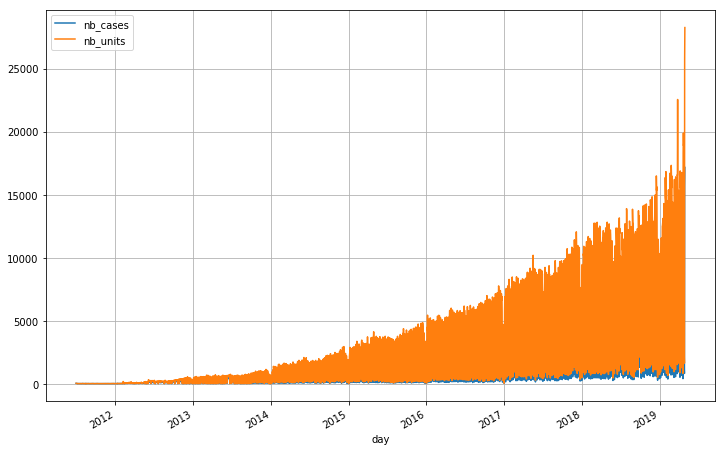

In [23]:
day_groups.plot(grid=True)

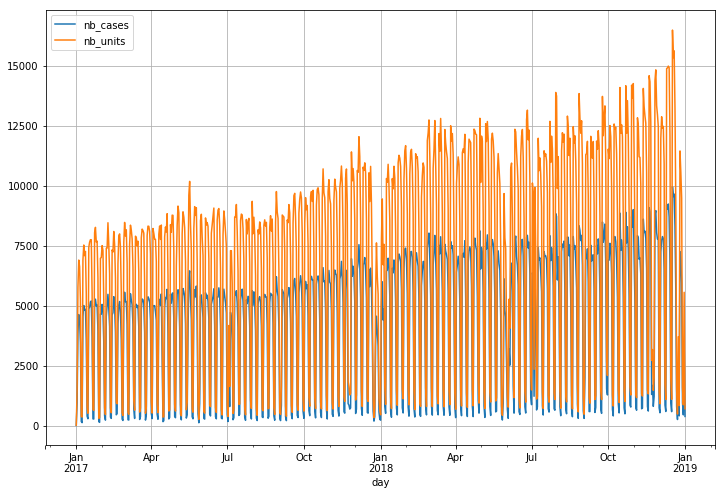

In [24]:
'''We notice an upward trend indicating that LabStar is getting more cases over time.
Although there are ups and downs at every point in time, generally we can observe that the trend increases.
Also we can notice how the ups and downs seem to be a bit regular, indicating that we might be observing a 
seasonal pattern here too.
We can look more closely at a subset of the data.'''
start_date = datetime(2017, 1, 1)
end_date = datetime(2019, 1, 1)
day_groups[(start_date <= day_groups.index) & (day_groups.index <= end_date)].plot(grid=True)